In [ ]:
#os – rad sa fajl sistemom (provera da li fajl postoji)
#pandas – rad sa tabelama (CSV, Excel)
#numpy – numeričke operacije
#matplotlib.pyplot – crtanje grafika
#scipy.stats – statističke funkcije (npr. t-test)
#sklearn.linear_model.LinearRegression – linearna regresija
#PolynomialFeatures, make_pipeline – polinomska regresija

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


csv_name = "nba_2022-23_all_stats_with_salary.xls"
# Provera da li fajl postoji u trenutnom direktorijumu
if os.path.exists(csv_name):
    data = pd.read_csv(csv_name)
    print(f"Učitano '{csv_name}' iz trenutnog direktorijuma.")
else:
    print(f"Fajl '{csv_name}' nije pronađen u {os.getcwd()}.")
    print("Sadržaj direktorijuma:")
    for f in os.listdir():
        print(" -", f)
    # Ako nije pronađen, podesi ovu promenljivu na punu putanju do svog CSV fajla
    # data = pd.read_csv(r"C:\putanja\do\nba_2022-23_all_stats_with_salary.csv")
    raise FileNotFoundError(f"Fajl '{csv_name}' nije pronađen. Postavite tačnu putanju u ovoj ćeliji.")

# Brzi pregled dataset-a
print('\nDimenzije dataset-a:', data.shape)
display(data.head())
print('\nNazivi kolona:')
print(list(data.columns))

Učitano 'nba_2022-23_all_stats_with_salary.xls' iz trenutnog direktorijuma.

Dimenzije dataset-a: (467, 52)


,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9



Nazivi kolona:
['Unnamed: 0', 'Player Name', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']


In [ ]:

data = pd.read_csv("nba_2022-23_all_stats_with_salary.xls")
# Deskriptivna statistika
print("Numeričke kolone:")
display(data.describe())

print("Kategorijalne kolone:")
display(data.describe(include='object'))

Numeričke kolone:


,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,0.996574,...,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,0.880468,...,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,...,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,...,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,1.500000,...,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,...,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


Kategorijalne kolone:


,Player Name,Position,Team
count,467,467,467
unique,467,9,75
top,Jacob Gilyard,SG,SAC
freq,1,115,19


In [ ]:
#Bezuslovna verovatnoća
if 'Position' in data.columns:
    p_st = (data['Position'] == 'PG').mean()
    print("P(position == 'PG') =", p_st)
else:
    print("Kolona 'Position' ne postoji u dataset-u.")

#Uslovna verovatnoća ako postoje kolone 'Salary' i 'Team'
if 'Team' in data.columns and 'Salary' in data.columns:
    sample_Team = data['Team'].value_counts().index[0]
    Team_df = data[data['Team'] == sample_Team]
#Kreira podskup podataka samo za taj tim
    print(f"Primer uslovne verovatnoće unutar najbrojnije lige: {sample_Team}")
    most_common_nat = Team_df['Salary'].value_counts().idxmax()
    p_nat_given_Team = (Team_df['Salary'] == most_common_nat).mean()
#Računa uslovnu verovatnoću: verovatnoću da igrač ima tu najčešću platu, pod uslovom da igra u tom timu.
    print(f"P(Salary == {most_common_nat} | Team == {sample_Team}) =", p_nat_given_Team)
else:
    print("Nisu pronađene kolone 'Team' i/ili 'Salary' za primer uslovne verovatnoće.")

P(position == 'PG') = 0.16488222698072805
Primer uslovne verovatnoće unutar najbrojnije lige: SAC
P(Salary == 508891 | Team == SAC) = 0.10526315789473684


In [ ]:
# (numeričke)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
#bira sve numeričke kolone iz dataset-a.
print("Numeričke kolone:", numeric_cols)

# Primer za 'Overall' ako postoji
cols_to_show = []
for col in ['GS', 'MP', 'Age', 'Salary', 'FG']:
    if col in data.columns:
        cols_to_show.append(col)

if cols_to_show:
    stats_df = data[cols_to_show].agg(['count','mean','var','std','min','max','median'])
    display(stats_df)
    # Kvartili
    display(data[cols_to_show].quantile([0.25, 0.5, 0.75]))
else:
    print("Nisu pronađene preporučene kolone (GS, MP, Age, Salary, FG). Odaberi druge numeričke kolone.")

Numeričke kolone: ['Unnamed: 0', 'Salary', 'Age', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']


,GS,MP,Age,Salary,FG
count,467.000000,467.000000,467.000000,4.670000e+02,467.000000
mean,22.650964,19.871306,25.820128,8.416599e+06,3.351392
var,734.116110,91.177372,18.276590,1.146638e+14,6.040958
std,27.094577,9.548684,4.275113,1.070812e+07,2.457836
min,0.000000,1.800000,19.000000,5.849000e+03,0.000000
max,83.000000,41.000000,42.000000,4.807001e+07,11.200000
median,8.000000,19.200000,25.000000,3.722040e+06,2.700000


,GS,MP,Age,Salary,FG
0.25,1.0,12.5,23.0,1782621.0,1.6
0.50,8.0,19.2,25.0,3722040.0,2.7
0.75,45.5,28.3,29.0,10633543.5,4.3


In [ ]:
#Kovarijansa kako se dve promenljive međusobno ponašaju
# Kovarijansa i korelacija među važnim numeričkim kolonama (ako postoje)
# Koleracija mera jačinu i pravac linearne veze između dve promenljive
cols = [c for c in ['GS', 'MP', 'Age', 'Salary', 'FG'] if c in data.columns]
if len(cols) >= 2:
    display(data[cols].cov())
    display(data[cols].corr())
else:
    print("Nema dovoljno kolona za kovarijansu/korelaciju. Trenutne kolone:", cols)

,GS,MP,Age,Salary,FG
GS,7.341161e+02,2.141146e+02,1.147571e+01,1.747370e+08,5.020746e+01
MP,2.141146e+02,9.117737e+01,5.210708e+00,6.565357e+07,2.062086e+01
Age,1.147571e+01,5.210708e+00,1.827659e+01,1.904710e+07,9.240706e-01
Salary,1.747370e+08,6.565357e+07,1.904710e+07,1.146638e+14,1.895638e+07
FG,5.020746e+01,2.062086e+01,9.240706e-01,1.895638e+07,6.040958e+00


,GS,MP,Age,Salary,FG
GS,1.000000,0.827600,0.099072,0.602267,0.753933
MP,0.827600,1.000000,0.127646,0.642099,0.878638
Age,0.099072,0.127646,1.000000,0.416072,0.087944
Salary,0.602267,0.642099,0.416072,1.000000,0.720260
FG,0.753933,0.878638,0.087944,0.720260,1.000000


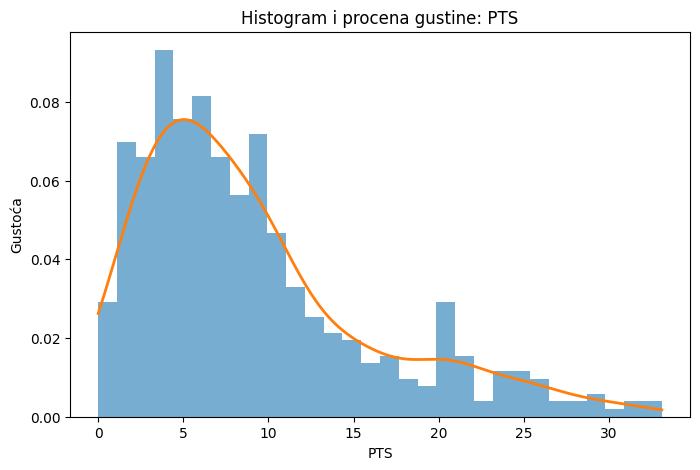

KS statistika (standardizovano) = 0.13294694485727288
p-vrednost = 1.1691369827337766e-07


In [ ]:
# Histogram i KS test za 'Overall'
col = 'PTS'
if col in data.columns:
#uzimamo sve vrednosti iz kolone
    x = data[col].dropna()
    plt.figure(figsize=(8,5))
    plt.hist(x, bins=30, density=True, alpha=0.6)
    # KDE approximation using scipy gaussian_kde for plotting
    try:
#pravi glatku funkciju gustine na osnovu podataka.
        kde = stats.gaussian_kde(x)
#generiše 200 tačaka između minimuma i maksimuma kolone za crtanje linije.
        xs = np.linspace(x.min(), x.max(), 200)
        plt.plot(xs, kde(xs), linewidth=2)
    except Exception:
        pass
    plt.title(f"Histogram i procena gustine: {col}")
    plt.xlabel(col)
    plt.ylabel("Gustoća")
    plt.show()
    #KS test za normalnost (podešavamo na normalnu sa istim mean/std)
    stat, pval = stats.kstest((x - x.mean())/x.std(), 'norm')
    print("KS statistika (standardizovano) =", stat)
    print("p-vrednost =", pval)
else:
    print(f"Kolona '{col}' nije prisutna u datasetu.")

In [ ]:
col = 'PTS'
# Osigurava da ne dodje do greske ako nema kolone PTS
if col in data.columns:
#uklanjaju se nedostajuće vrednosti.
    x = data[col].dropna()
    mean = x.mean()
    #trazi se srednja vrednost
#standardna greška proseka
    se = stats.sem(x)
    ci = stats.t.interval(0.95, len(x)-1, loc=mean, scale=se)
    print(f"Mean = {mean:.4f}")
    print("95% interval poverenja za srednju vrednost:", ci)
else:
    print(f"Kolona '{col}' nije prisutna u datasetu.")


Mean = 9.1300
95% interval poverenja za srednju vrednost: (np.float64(8.501998267472219), np.float64(9.75795890597532))


In [ ]:
# t-test između dve grupe (PG vs SG) za kolonu 'PTS'
if 'Position' in data.columns and 'PTS' in data.columns:
    # filtriramo po poziciji
    pg_pts = data[data['Position']=='PG']['PTS'].dropna()
    sg_pts = data[data['Position']=='SG']['PTS'].dropna()

    #t-test između PG i SG poena
    #da li dve grupe imaju statistički različite prosečne vrednosti.
    t_stat, p_val = stats.ttest_ind(pg_pts, sg_pts, equal_var=False)
    print("t-statistic:", t_stat)
    print("p-value:", p_val)
else:
    print("Kolone 'Position' i/ili 'PTS' nisu pronađene.")

t-statistic: 1.261937053417228
p-value: 0.20908147530489032


Kolone dostupne za regresiju: ['PTS', 'Age', 'Salary']
Ciljna kolona za regresiju: Salary

Jednostavna linearna regresija (PTS -> Salary)
Koeficijent: 1128176.1496891414
Intercept: -1883625.3413909916
R^2: 0.5293969474452553


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


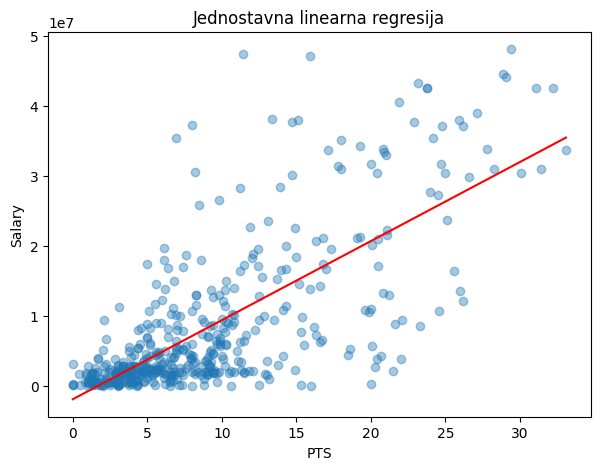


Višestruka linearna regresija (cols: ['PTS', 'Salary', 'Age'])
Koeficijenti: [-6.48910777e-10  1.00000000e+00 -4.40129321e-11]
Intercept: 5.587935447692871e-09
R^2: 1.0

Polinomska regresija (degree=2) PTS -> Salary
R^2: 0.5394099533349044


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


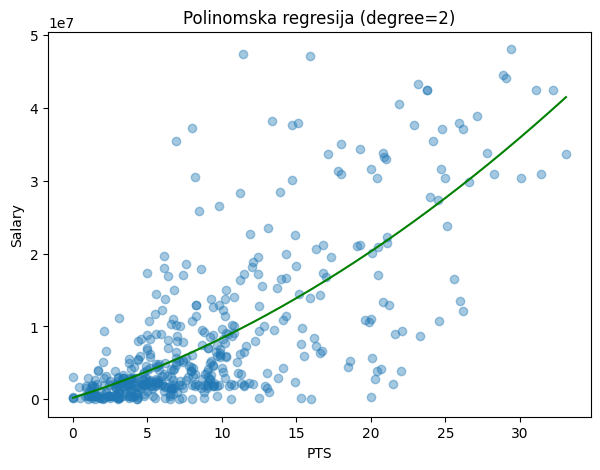

In [ ]:
# Priprema podataka za regresiju
regress_cols = ['PTS','Age','Salary']
present = [c for c in regress_cols if c in data.columns]
print("Kolone dostupne za regresiju:", present)

#da li imamo ciljnu promenljivu 'Salary' numerički
if 'Salary' in data.columns:
    # Konvertujemo 'Salary' i 'PTS' ako su u string formatu (npr. '€200K' itd.)
    def to_numeric_money(s):
        # Pokušava da izvadi broj iz stringova tipa '€200K', '€1.2M', '200K'
        if pd.isna(s):
            return np.nan
        if isinstance(s, (int, float)):
            return s
        s = str(s).replace('€','').replace(',','').strip()
        try:
            if s.endswith('M') or s.endswith('m'):
                return float(s[:-1]) * 1_000_000
            if s.endswith('K') or s.endswith('k'):
                return float(s[:-1]) * 1_000
            return float(s)
        except:
            # fallback: remove non-numeric characters
            import re
            nums = re.findall(r"[-+]?\d*\.?\d+", s)
            return float(nums[0]) if nums else np.nan

    # Ako Salary nije numeric, pokušaj konverziju
    if not np.issubdtype(data['Salary'].dtype, np.number):
        data['Salary_numeric'] = data['Salary'].apply(to_numeric_money)
        target = 'Salary_numeric'
    else:
        target = 'Salary'

    print('Ciljna kolona za regresiju:', target)

    # Jednostavna linearna regresija: Salary -> PTS
    if 'PTS' in data.columns:
        X = data[['PTS']].dropna()
        y = data.loc[X.index, target].dropna()
        # Align indices
        common_idx = X.index.intersection(y.index)
        X = X.loc[common_idx]
        y = y.loc[common_idx]
        lin = LinearRegression()
        lin.fit(X, y)
        print('\nJednostavna linearna regresija (PTS -> Salary)')
        print('Koeficijent:', lin.coef_[0])
        print('Intercept:', lin.intercept_)
        print('R^2:', lin.score(X, y))

        # Plot
        plt.figure(figsize=(7,5))
        plt.scatter(X, y, alpha=0.4)
        xs = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
        plt.plot(xs, lin.predict(xs), color='red')
        plt.xlabel('PTS')
        plt.ylabel('Salary')
        plt.title('Jednostavna linearna regresija')
        plt.show()
    else:
        print('Kolona Salary nije prisutna za jednostavnu regresiju.')

    # Višestruka linearna regresija: PTS, Salary, Age
    mult_cols = [c for c in ['PTS','Salary','Age'] if c in data.columns]
    if len(mult_cols) >= 2:
        X_multi = data[mult_cols].dropna()
        y_multi = data.loc[X_multi.index, target].dropna()
        common_idx = X_multi.index.intersection(y_multi.index)
        X_multi = X_multi.loc[common_idx]
        y_multi = y_multi.loc[common_idx]
        multi = LinearRegression()
        multi.fit(X_multi, y_multi)
        print('\nVišestruka linearna regresija (cols: {})'.format(mult_cols))
        print('Koeficijenti:', multi.coef_)
        print('Intercept:', multi.intercept_)
        print('R^2:', multi.score(X_multi, y_multi))
    else:
        print('Nema dovoljno kolona za višestruku regresiju.')

    # Polinomska regresija (degree=2) Salary -> PTS
    if 'PTS' in data.columns:
        Xp = data[['PTS']].dropna()
        yp = data.loc[Xp.index, target].dropna()
        common_idx = Xp.index.intersection(yp.index)
        Xp = Xp.loc[common_idx]
        yp = yp.loc[common_idx]
        poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
        poly.fit(Xp, yp)
        print('\nPolinomska regresija (degree=2) PTS -> Salary')
        print('R^2:', poly.score(Xp, yp))

        # Plot
        x_vals = np.linspace(Xp.min(), Xp.max(), 200).reshape(-1,1)
        plt.figure(figsize=(7,5))
        plt.scatter(Xp, yp, alpha=0.4)
        plt.plot(x_vals, poly.predict(x_vals), color='green')
        plt.xlabel('PTS')
        plt.ylabel('Salary')
        plt.title('Polinomska regresija (degree=2)')
        plt.show()
    else:
        print('Kolona PTS nije prisutna za polinomsku regresiju.')
else:
    print("Ciljna kolona 'Salary' nije pronađena u datasetu. Potrebna je za regresiju.")